In [1]:
from google.colab import drive
drive.mount('/content/drive')

from keras.preprocessing.image import array_to_img
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

path = "/content/drive/MyDrive/Colab Notebooks/Project 0/Project 0/Notebooks"
import sys
sys.path.append(path)
from funcs import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Scanpath Images

#### AP

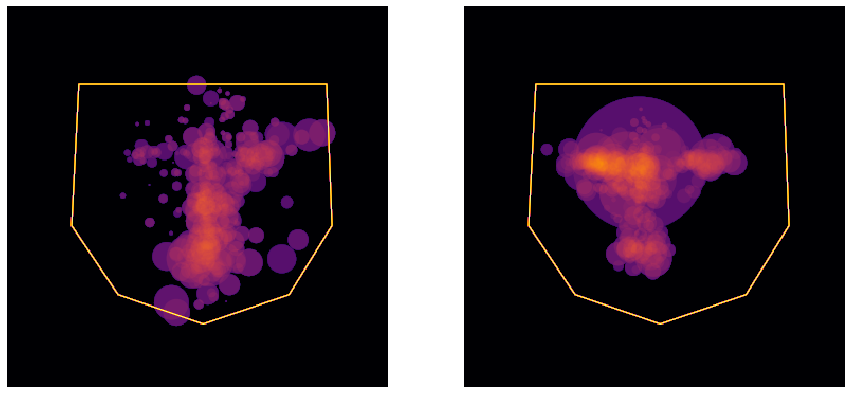

In [19]:
positiveImages, negativeImages = groupResults(path,imageFolder='Scanpath Images - AP',modelName='scanpath_images_ap',positiveClass='AP',temporalModel=False)

#### DP

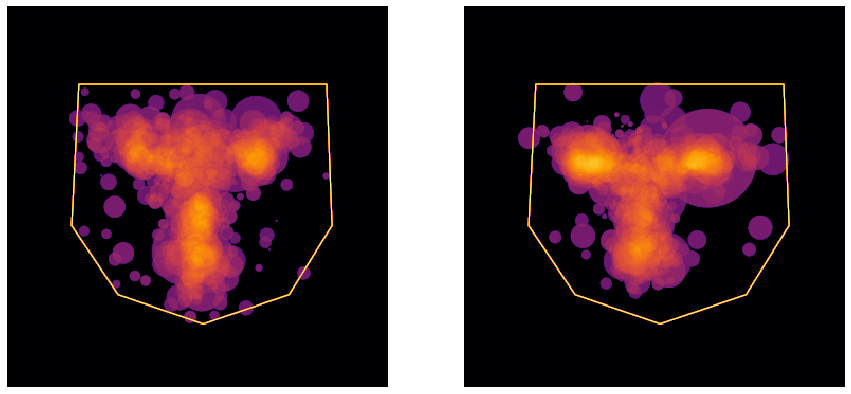

In [ ]:
positiveImages, negativeImages = groupResults(path,imageFolder='Scanpath Images - DP',modelName='scanpath_images_dp',positiveClass='DP',temporalModel=False)

# Temporal Images

#### AP

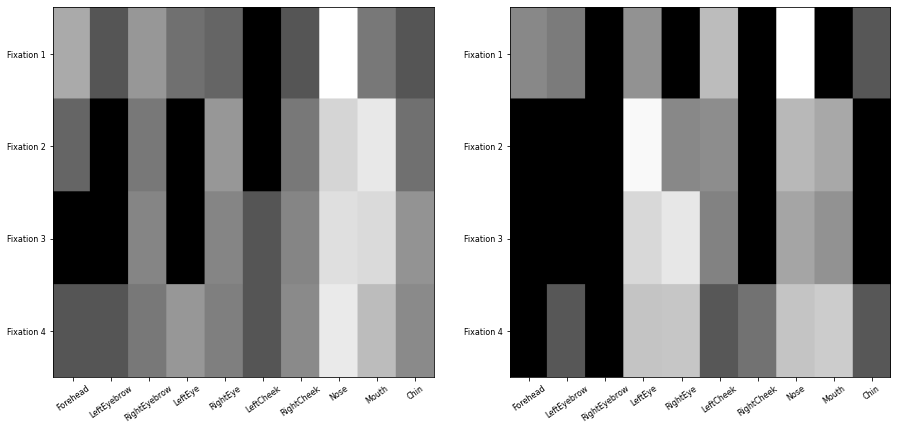

In [21]:
positiveImagesAP, negativeImagesAP = groupResults(path,imageFolder='Temporal Images - AP',modelName='temporal_images_ap',positiveClass='AP',temporalModel=True)

#### DP

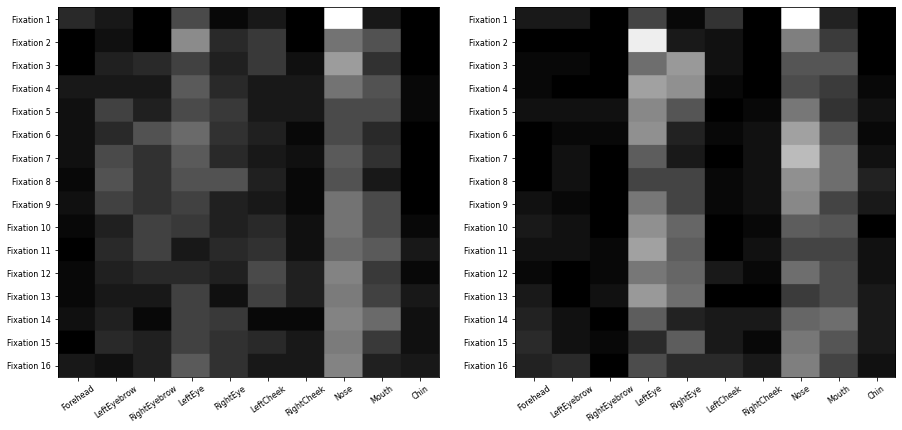

In [3]:
positiveImagesDP,  negativeImagesDP = groupResults(path,imageFolder='Temporal Images - DP',modelName='temporal_images_dp',positiveClass='DP',temporalModel=True)

In [13]:
factor = 1/4

positiveImagesAP = positiveImagesAP**factor
negativeImagesAP = negativeImagesAP**factor

positiveImagesDP = positiveImagesDP**factor
negativeImagesDP = negativeImagesDP**factor

# Plotting Face Heatmpas

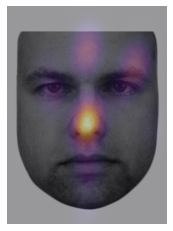

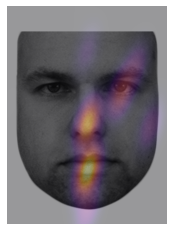

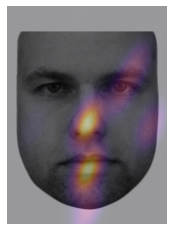

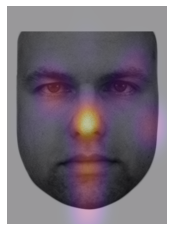

In [22]:
# ap
for s in range(4):
  faceHeatmap(path=path,image=positiveImagesAP,positiveClass='AP',section=s)

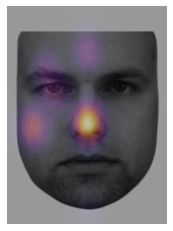

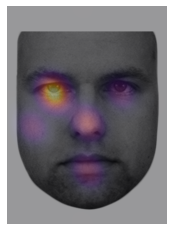

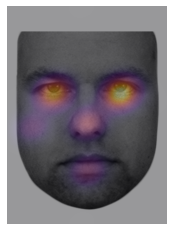

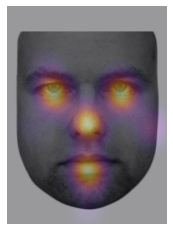

In [23]:
# ap
for s in range(4):
  faceHeatmap(path=path,image=negativeImagesAP,positiveClass='AP',section=s)

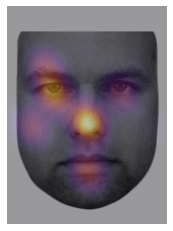

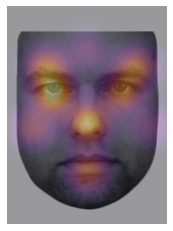

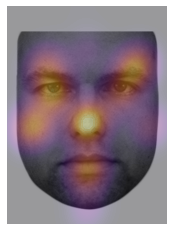

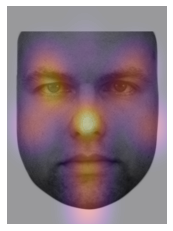

In [8]:
# dp
for s in range(4):
  faceHeatmap(path=path,image=positiveImagesDP,positiveClass='DP',section=s)

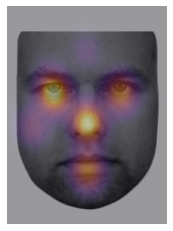

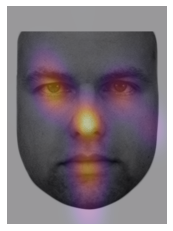

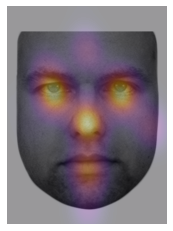

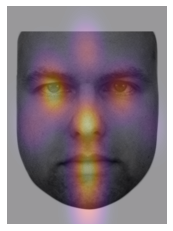

In [9]:
# dp
for s in range(4):
  faceHeatmap(path=path,image=negativeImagesDP,positiveClass='DP',section=s)

# Contrast Comparison

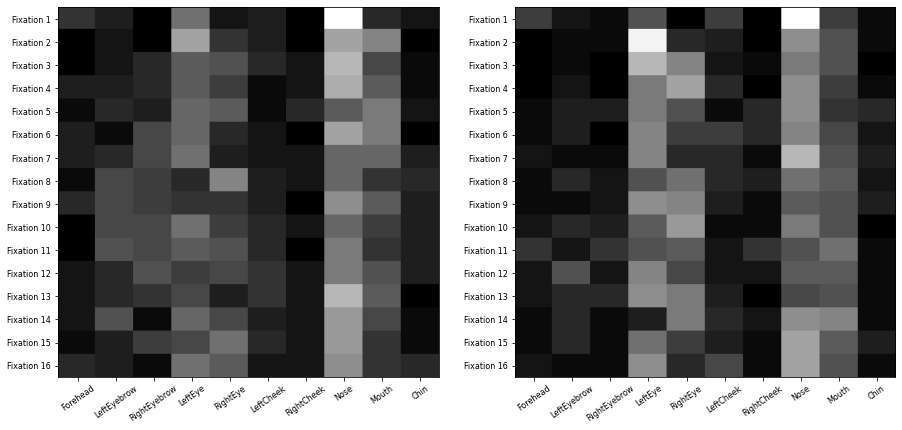

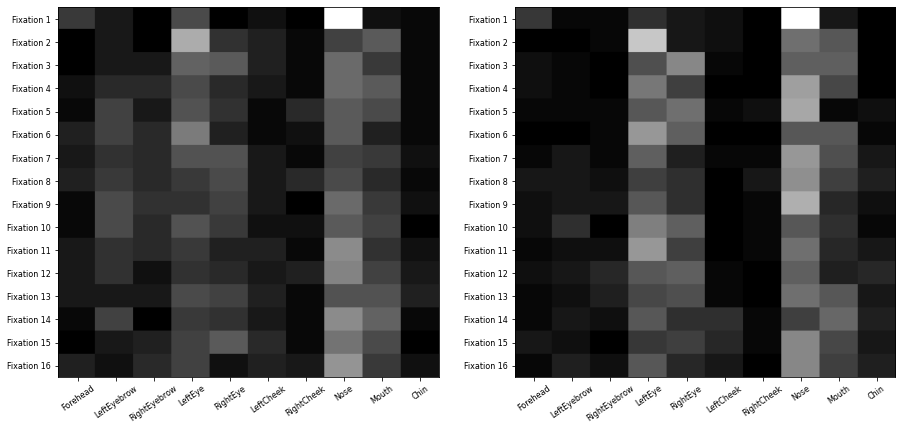

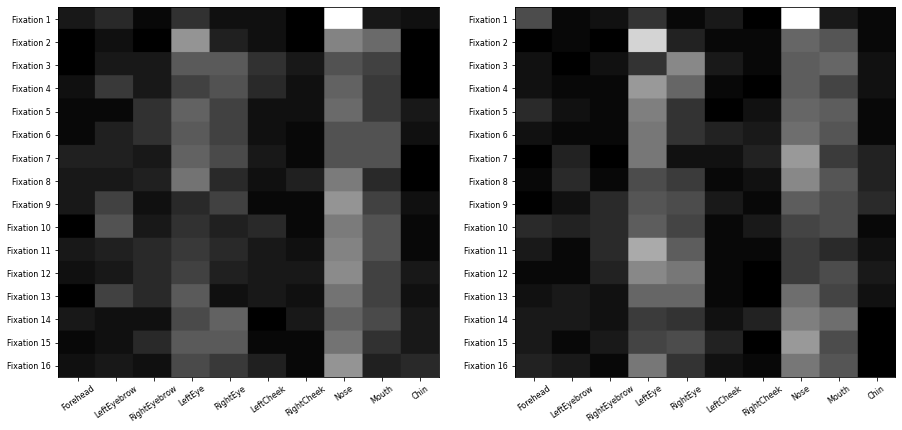

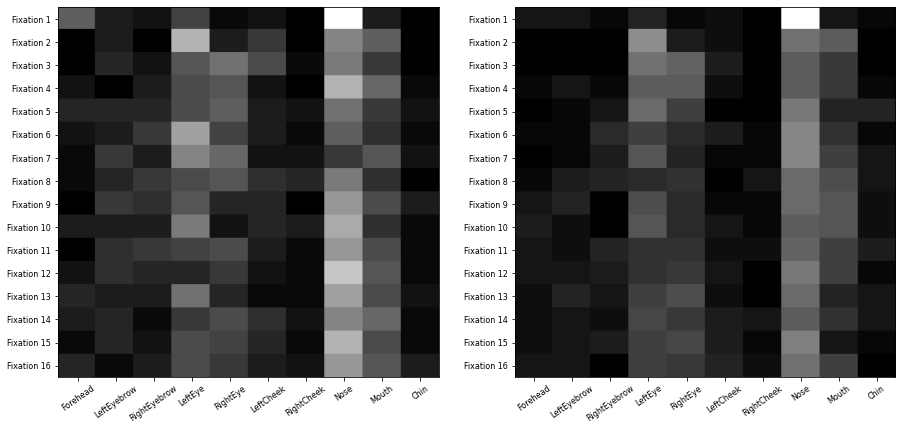

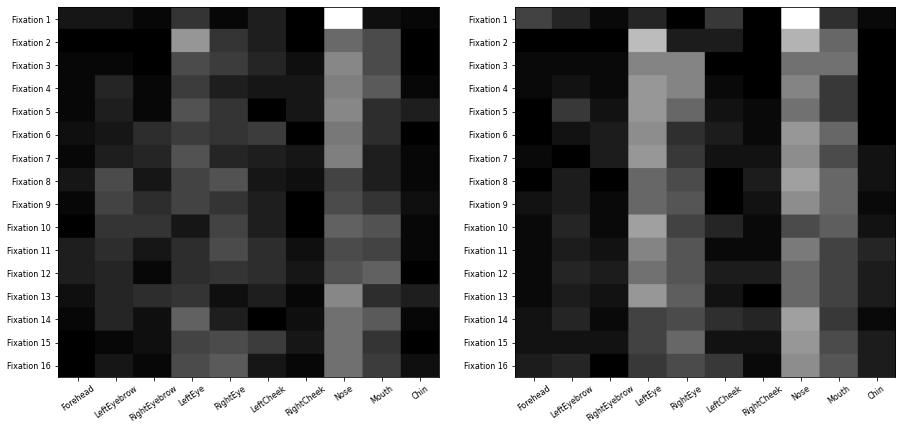

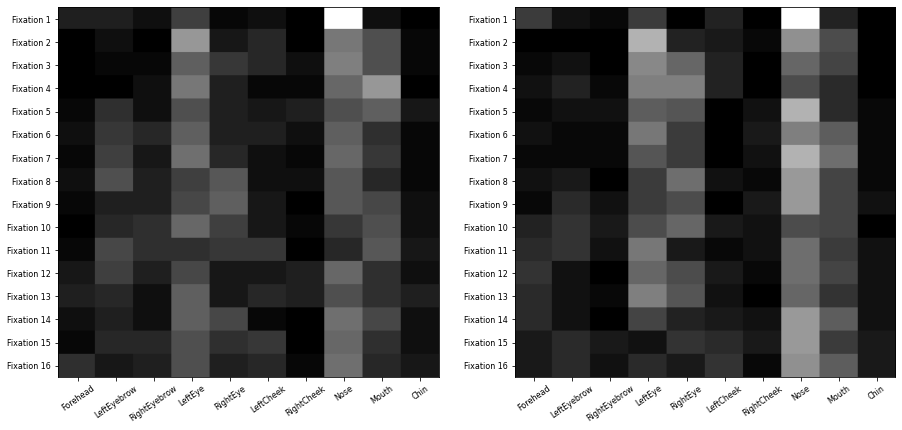

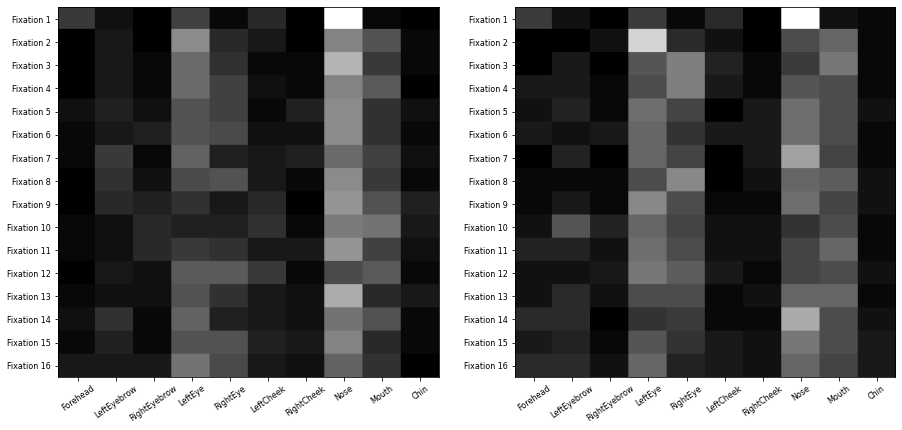

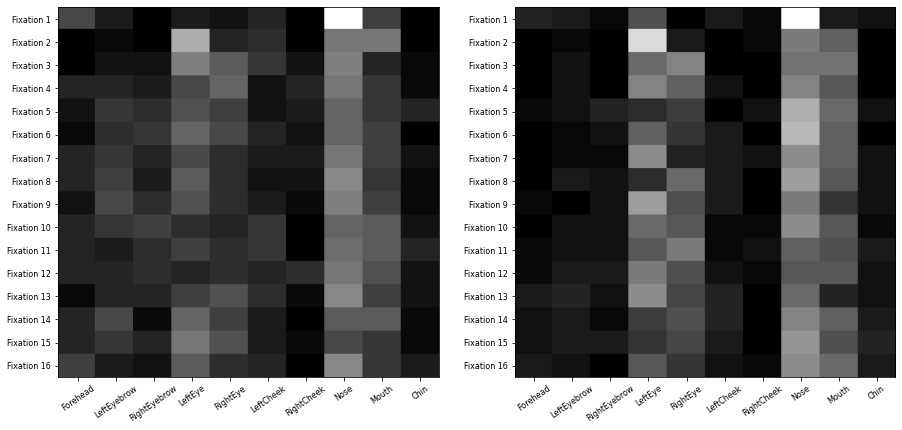

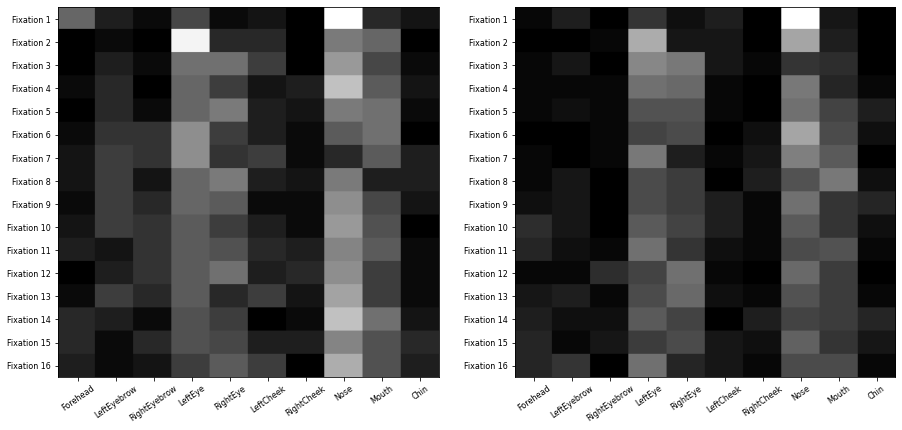

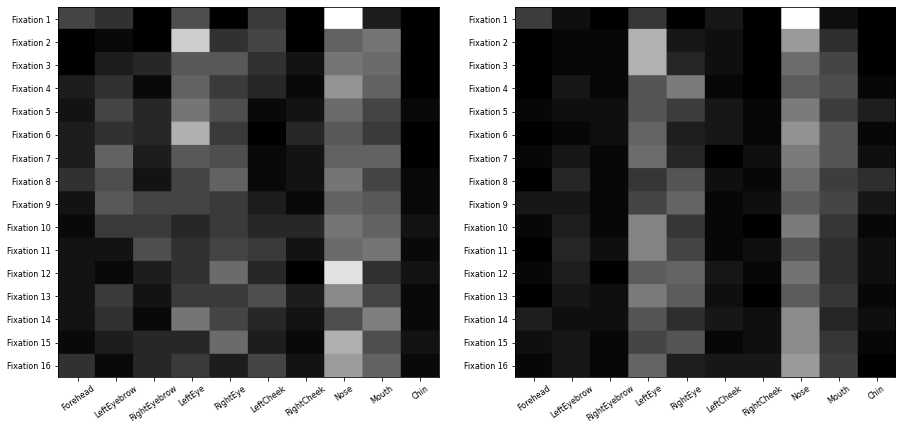

In [ ]:
imagesDict = {'positiveImages':[],'negativeImages':[]}
for i in range(10):
  positive, negative = groupResults(path,imageFolder='Temporal Images - DP',modelName='temporal_images_dp',positiveClass='DP',temporalModel=True,runNumber=i)
  imagesDict['positiveImages'].append(positive)
  imagesDict['negativeImages'].append(negative)

In [ ]:
import plotly.graph_objects as go
# create dataframes for the positive and negatve group with columns: mean contrast fpr all 10 runs and the SD
positivePlot = {'mean_contrast':[],'SD':[]}
for i in range(16):
  allRunsCont = []
  for run in range(10):
    fixationROIs = imagesDict['positiveImages'][run][:,:,0][0+(i)*18,::28]
    allRunsCont.append(np.var(fixationROIs))
  positivePlot['SD'].append(np.std(np.array(allRunsCont)))
  positivePlot['mean_contrast'].append(np.mean(np.array(allRunsCont)))


negativePlot = {'mean_contrast':[],'SD':[]}
for i in range(16):
  allRunsCont = []
  for run in range(10):
    fixationROIs = imagesDict['negativeImages'][run][:,:,0][0+(i)*18,::28]
    allRunsCont.append(np.var(fixationROIs))
  negativePlot['SD'].append(np.std(np.array(allRunsCont)))
  negativePlot['mean_contrast'].append(np.mean(np.array(allRunsCont)))


positiveDf = pd.DataFrame.from_dict(positivePlot)
negativeDf = pd.DataFrame.from_dict(negativePlot)

positiveDf['SE'] = positiveDf['SD']/(10**(1/2))
negativeDf['SE'] = negativeDf['SD']/(10**(1/2))

In [ ]:
fig = go.Figure(data=[go.Line(x=[i for i in range(1,17)],y= positiveDf['mean_contrast'],error_y=dict(type='data',array=(positiveDf['SE']/2).tolist()),name='High Probability Prosopagnosic',marker_color='black'),
                      go.Line(x=[i for i in range(1,17)],y=negativeDf['mean_contrast'],error_y=dict(type='data',array=(negativeDf['SE']/2).tolist()),name='High Probability Control',marker_color='darkgrey')])
fig.update_layout(paper_bgcolor='white',plot_bgcolor='white',width=1300,height=600,legend=dict(font_size=20))
fig.update_xaxes(title='Fixation Number',tickmode='linear',title_font_size=25,tickfont=dict(size=25))
fig.update_yaxes(title='Image Contrast at Fixation n  for 1<=n<=15',showticklabels=False,title_font_size=25,tickfont=dict(size=25))


/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
# create the dataframe required for the ANOVA
contrastDict = {'model':[],'group':[],'fixation_number':[],'contrast':[]}

for run in range(10):
  for i in range(16):
    fixationROIs = imagesDict['positiveImages'][run][:,:,0][0+(i)*18,::28]
    contrastDict['model'].append(f'run_{run+1}')
    contrastDict['contrast'].append(np.var(fixationROIs))
    contrastDict['fixation_number'].append(f'fix_{i+1}')
    contrastDict['group'].append('positive')
  
for run in range(10):
  for i in range(16):
    fixationROIs = imagesDict['negativeImages'][run][:,:,0][0+(i)*18,::28]
    contrastDict['model'].append(f'run_{run+1}')
    contrastDict['contrast'].append(np.var(fixationROIs))
    contrastDict['fixation_number'].append(f'fix_{i+1}')
    contrastDict['group'].append('negative')

In [ ]:
# two way ANOVA 
contrastDf = pd.DataFrame.from_dict(contrastDict)
!pip install pingouin
import pingouin as pg
res = pg.rm_anova(dv='contrast', within=['fixation_number','group'], subject='model', 
                  data=contrastDf, detailed=True)
res

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,fixation_number,2.687717e+14,15,135,1.791811e+13,95.032822,5.900203e-64,8.047876e-24,0.913489,0.350449
1,group,2.380232e+13,1,9,2.380232e+13,22.838868,1.002671e-03,1.002671e-03,0.717327,1.000000
2,fixation_number * group,9.555337e+12,15,135,6.370225e+11,2.573592,2.060888e-03,5.322261e-02,0.222368,0.270045
